In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_txs_features.csv
/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_txs_classes.csv
/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv


1. Data Loading (Elliptic Dataset)

In [2]:
import pandas as pd
import numpy as np

# Visualization (later phases)
import matplotlib.pyplot as plt
import seaborn as sns

# Basic settings
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

In [3]:
DATA_PATH = "/kaggle/input/elliptic-data-set/elliptic_bitcoin_dataset"

FEATURES_PATH = f"{DATA_PATH}/elliptic_txs_features.csv"
CLASSES_PATH  = f"{DATA_PATH}/elliptic_txs_classes.csv"
EDGES_PATH    = f"{DATA_PATH}/elliptic_txs_edgelist.csv"

In [4]:
# Load transaction features
tx_features = pd.read_csv(FEATURES_PATH, header=None)

# Load class labels
tx_classes = pd.read_csv(CLASSES_PATH)

# Load transaction graph edges
tx_edges = pd.read_csv(EDGES_PATH)

In [5]:
print("Transaction Features Shape:", tx_features.shape)
tx_features.head()

Transaction Features Shape: (203769, 167)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,-0.167933,-0.049707,-0.164402,-0.028741,-0.035391,-0.042955,-0.013282,-0.057195,-0.169609,-0.171154,-0.174473,-1.373657,-1.371460,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,-0.235896,0.036577,0.042345,-0.414005,-0.488340,-0.232553,-0.467554,0.048767,0.052956,-0.039149,-0.172895,-0.163126,-0.160932,-1.316342,-1.315388,-0.039144,-0.172884,-0.163115,-0.160925,-1.316333,-1.315375,-0.017032,-0.030026,-0.017640,-0.015071,-0.140763,-0.140335,-0.095403,-0.264376,-0.250523,-0.263703,1.133527,1.135947,-0.059013,-0.262368,-0.255111,-0.259194,1.125590,1.128038,-0.293773,-0.159732,0.034039,-0.183816,1.135523,1.135279,-0.169160,-0.201584,-0.116817,-0.191472,-0.014659,-0.018849,-1.457953,-1.494057,-0.083459,-1.485972,-0.088798,-0.090437,-0.166550,-0.216536,-0.134546,-0.194817,-0.003175,-0.004094,-1.096336,-1.267340,-0.349933,-1.230441,-0.004358,-0.004194,-0.116425,-0.176617,-0.137323,-0.152464,-0.026060,-0.027660,-0.093145,-0.143707,-0.097719,-0.127462,0.003143,0.002426,-0.120950,-0.199145,-0.187993,-0.212948,1.064205,1.063787,-1.373782,-1.354735,-0.297975,-1.403698,1.342003,1.340733,-0.171601,-0.458162,-0.423588,-0.440883,-1.015963,-1.016230,-0.968903,-0.375715,0.759748,-0.768329,1.488113,1.487932,-0.216814,-0.605631,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,-0.164417,-0.028741,-0.035391,-0.042955,-0.013282,-0.055327,-0.169757,-0.171477,-0.174490,0.887058,0.884557,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,-0.235896,0.036577,0.042345,-0.413965,-0.488307,-0.232553,-0.467516,0.048767,0.052956,-0.039151,-0.172895,-0.163126,-0.160933,0.923473,0.923011,-0.039146,-0.172884,-0.163114,-0.160926,0.923516,0.923110,-0.017032,-0.030026,-0.017640,-0.015071,-0.140763,-0.140335,-0.095403,-0.264425,-0.250574,-0.263753,-0.169119,-0.167165,-0.059013,-0.262424,-0.255168,-0.259251,-0.187191,-0.185274,-0.293692,-0.760700,-0.692777,-0.719789,-1.084907,-1.084845,-0.170113,-0.202332,-0.116817,-0.192405,-0.014659,-0.018849,-1.457921,-1.494024,-0.083459,-1.485939,-0.088798,-0.090437,-0.166550,-0.216536,-0.134546,-0.194817,-0.003175,-0.004094,-1.096336,-1.267340,-0.349933,-1.230441,-0.004358,-0.004194,-0.116425,-0.176617,-0.137323,-0.152464,-0.026060,-0.027660,-0.093145,-0.143707,-0.097719,-0.127462,0.003143,0.002426,-0.121330,-0.110933,-0.075909,-0.111641,-1.159649,-1.160129,-1.373723,-1.353918,-0.295982,-1.403215,-0.975738,-0.975237,-0.168742,-0.263290,-0.186389,-0.250875,-1.015963,-1.016230,-0.968903,0.146997,1.366287,-0.464773,-1.116918,-1.116948,-0.216814,0.634272,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,-0.049707,-0.165054,-0.028741,-0.035391,-0.042955,-0.013282,

Rows ≈= 203,769 transactions

Columns = 167 features

Column 0 → Transaction ID

Column 1 → Time step

Columns 2–166 → Engineered features

In [6]:
print("Transaction Classes Shape:", tx_classes.shape)
tx_classes

Transaction Classes Shape: (203769, 2)


,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown
...,...,...
203764,173077460,unknown
203765,158577750,unknown
203766,158375402,1
203767,158654197,unknown


txId → Transaction ID

class → Label (1 = illicit, 2 = licit, 0 = unknown)

In [7]:
print("Transaction Edges Shape:", tx_edges.shape)
tx_edges.head()

Transaction Edges Shape: (234355, 2)


,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


txId1 → txId2

Bitcoin value flows from txId1 to txId2

This creates the transaction network

In [8]:
# First column is transaction ID, second is timestep
feature_columns = ["txId", "time_step"]

# Remaining features
feature_columns += [f"feature_{i}" for i in range(1, tx_features.shape[1] - 1)]

tx_features.columns = feature_columns

In [9]:
print("Missing values in features:", tx_features.isna().sum().sum())
print("Missing values in classes:", tx_classes.isna().sum().sum())
print("Missing values in edges:", tx_edges.isna().sum().sum())

Missing values in features: 0
Missing values in classes: 0
Missing values in edges: 0


In [10]:
print("Unique transactions in features:", tx_features["txId"].nunique())
print("Unique transactions in labels:", tx_classes["txId"].nunique())

Unique transactions in features: 203769
Unique transactions in labels: 203769


In [11]:
data = tx_features.merge(tx_classes, on="txId", how="left")

print("Merged dataset shape:", data.shape)
data.head()

Merged dataset shape: (203769, 168)


,txId,time_step,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,class
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,-0.167933,-0.049707,-0.164402,-0.028741,-0.035391,-0.042955,-0.013282,-0.057195,-0.169609,-0.171154,-0.174473,-1.373657,-1.371460,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,-0.235896,0.036577,0.042345,-0.414005,-0.488340,-0.232553,-0.467554,0.048767,0.052956,-0.039149,-0.172895,-0.163126,-0.160932,-1.316342,-1.315388,-0.039144,-0.172884,-0.163115,-0.160925,-1.316333,-1.315375,-0.017032,-0.030026,-0.017640,-0.015071,-0.140763,-0.140335,-0.095403,-0.264376,-0.250523,-0.263703,1.133527,1.135947,-0.059013,-0.262368,-0.255111,-0.259194,1.125590,1.128038,-0.293773,-0.159732,0.034039,-0.183816,1.135523,1.135279,-0.169160,-0.201584,-0.116817,-0.191472,-0.014659,-0.018849,-1.457953,-1.494057,-0.083459,-1.485972,-0.088798,-0.090437,-0.166550,-0.216536,-0.134546,-0.194817,-0.003175,-0.004094,-1.096336,-1.267340,-0.349933,-1.230441,-0.004358,-0.004194,-0.116425,-0.176617,-0.137323,-0.152464,-0.026060,-0.027660,-0.093145,-0.143707,-0.097719,-0.127462,0.003143,0.002426,-0.120950,-0.199145,-0.187993,-0.212948,1.064205,1.063787,-1.373782,-1.354735,-0.297975,-1.403698,1.342003,1.340733,-0.171601,-0.458162,-0.423588,-0.440883,-1.015963,-1.016230,-0.968903,-0.375715,0.759748,-0.768329,1.488113,1.487932,-0.216814,-0.605631,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,-0.164417,-0.028741,-0.035391,-0.042955,-0.013282,-0.055327,-0.169757,-0.171477,-0.174490,0.887058,0.884557,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.22

In [12]:
data["class"].value_counts()

class
unknown    157205
2           42019
1            4545
Name: count, dtype: int64

In [13]:
data.to_csv("elliptic_merged_raw.csv", index=False)

2. Data Cleaning & Label Processing

In [14]:
data["class"].value_counts().sort_index()

class
1            4545
2           42019
unknown    157205
Name: count, dtype: int64

Remove Unlabeled Transactions

In [15]:
# Keep only labeled data (licit & illicit)
labeled_data = data[data["class"] != "unknown"].copy()

print(labeled_data["class"].value_counts())
print("Shape:", labeled_data.shape)

class
2    42019
1     4545
Name: count, dtype: int64
Shape: (46564, 168)


In [16]:
labeled_data["class"] = labeled_data["class"].astype(int)

In [17]:
# 2 = licit → 0
# 1 = illicit → 1
labeled_data["label"] = labeled_data["class"].map({2: 0, 1: 1})

In [18]:
labeled_data["label"].value_counts()

label
0    42019
1     4545
Name: count, dtype: int64

label = 0 (Illicit), 1 (Licit)

3. Exploratory Data Analysis

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="Set2"
)

plt.rcParams["figure.figsize"] = (10, 6)

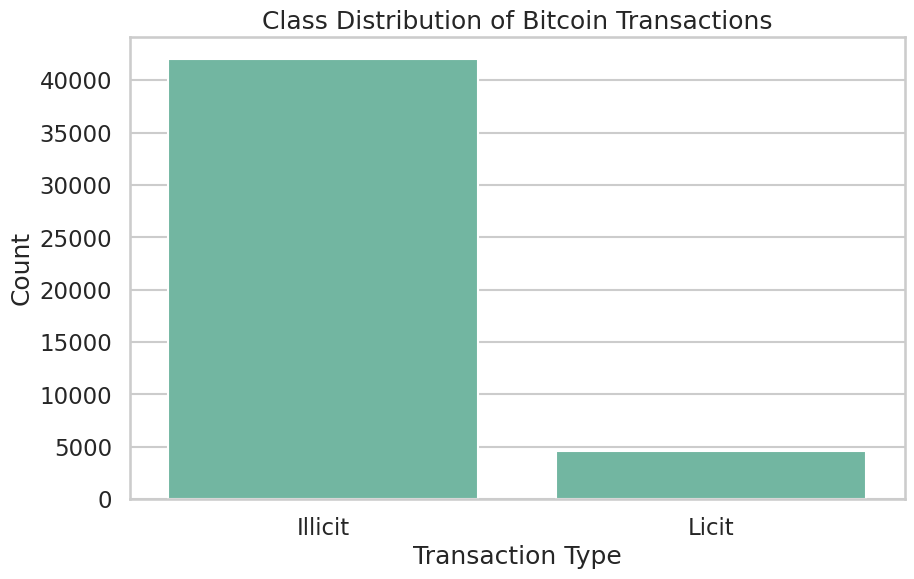

In [ ]:
# Class Distribution

sns.countplot(
    data=labeled_data,
    x="label"
)
plt.xticks([0,1], ["Licit", "Illicit"])
plt.title("Class Distribution of Bitcoin Transactions")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

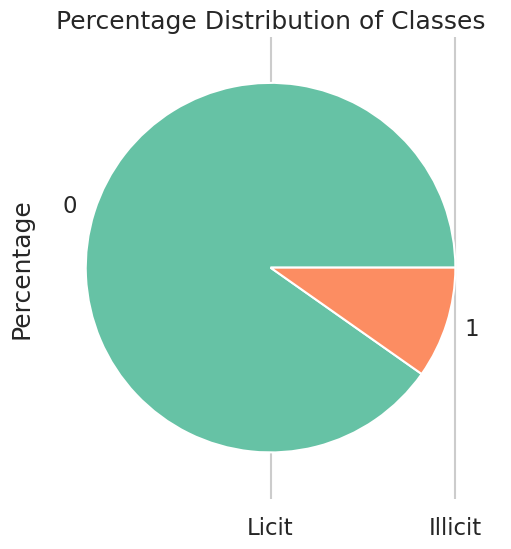

In [21]:
# Class Percentage Distribution

class_pct = labeled_data["label"].value_counts(normalize=True) * 100

class_pct.plot(kind="pie")
plt.xticks([0,1], ["Licit", "Illicit"], rotation=0)
plt.ylabel("Percentage")
plt.title("Percentage Distribution of Classes")
plt.show()

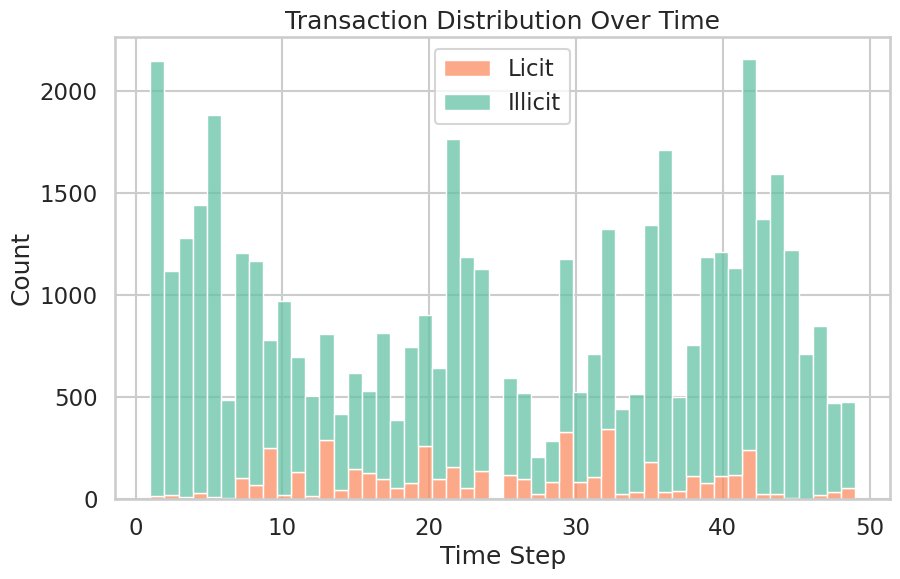

In [22]:
# Transactions Over Time

sns.histplot(
    labeled_data,
    x="time_step",
    hue="label",
    bins=50,
    multiple="stack"
)
plt.legend(["Licit", "Illicit"])
plt.title("Transaction Distribution Over Time")
plt.xlabel("Time Step")
plt.ylabel("Count")
plt.show()

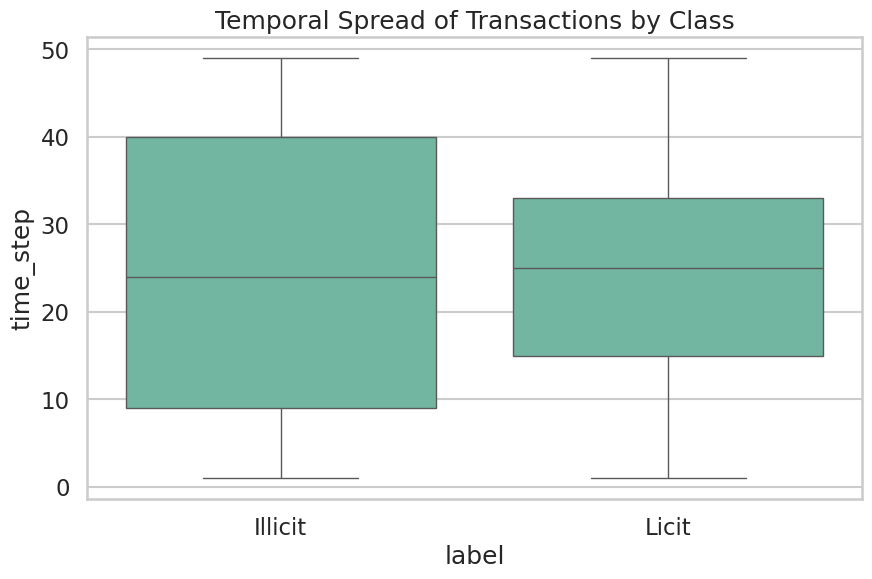

In [23]:
# Boxplot of Time Step by Class

sns.boxplot(
    data=labeled_data,
    x="label",
    y="time_step"
)
plt.xticks([0,1], ["Illicit", "Licit"])
plt.title("Temporal Spread of Transactions by Class")
plt.show()

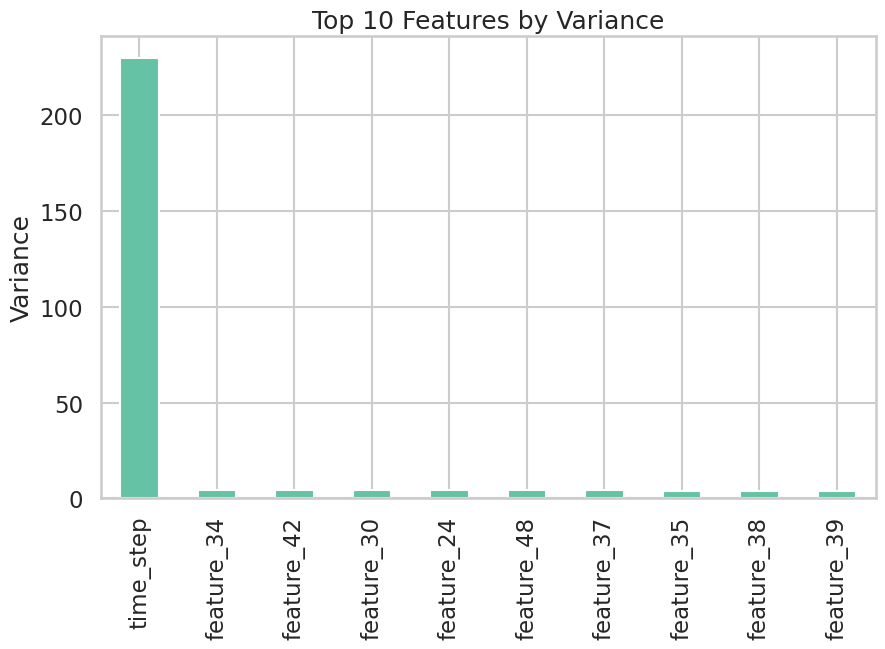

In [24]:
# Feature Variance (Top 10)

feature_variance = labeled_data.drop(
    columns=["txId", "label"]
).var().sort_values(ascending=False).head(10)

feature_variance.plot(kind="bar")
plt.title("Top 10 Features by Variance")
plt.ylabel("Variance")
plt.show()

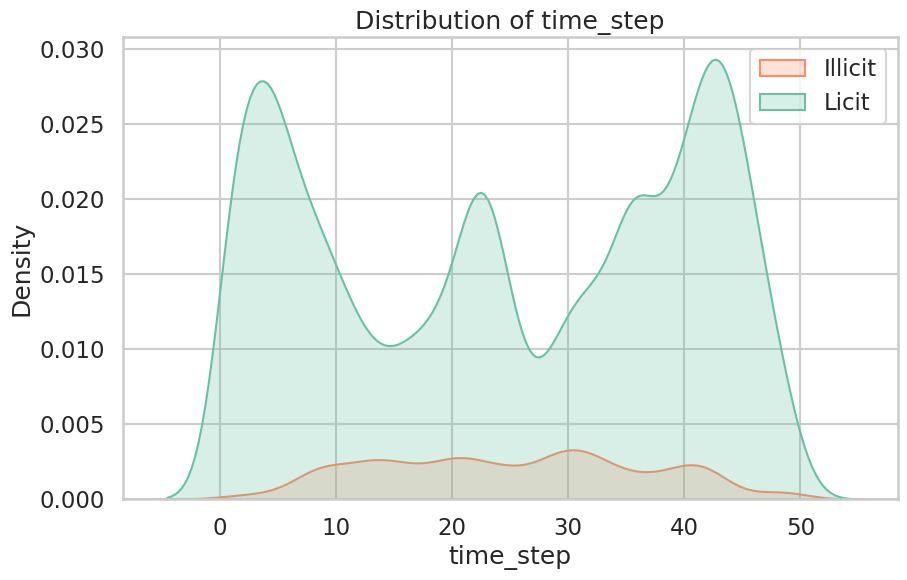

In [25]:
# Distribution of a High-Variance Feature

top_feature = feature_variance.index[0]

sns.kdeplot(
    data=labeled_data,
    x=top_feature,
    hue="label",
    fill=True
)
plt.legend(["Illicit", "Licit"])
plt.title(f"Distribution of {top_feature}")
plt.show()

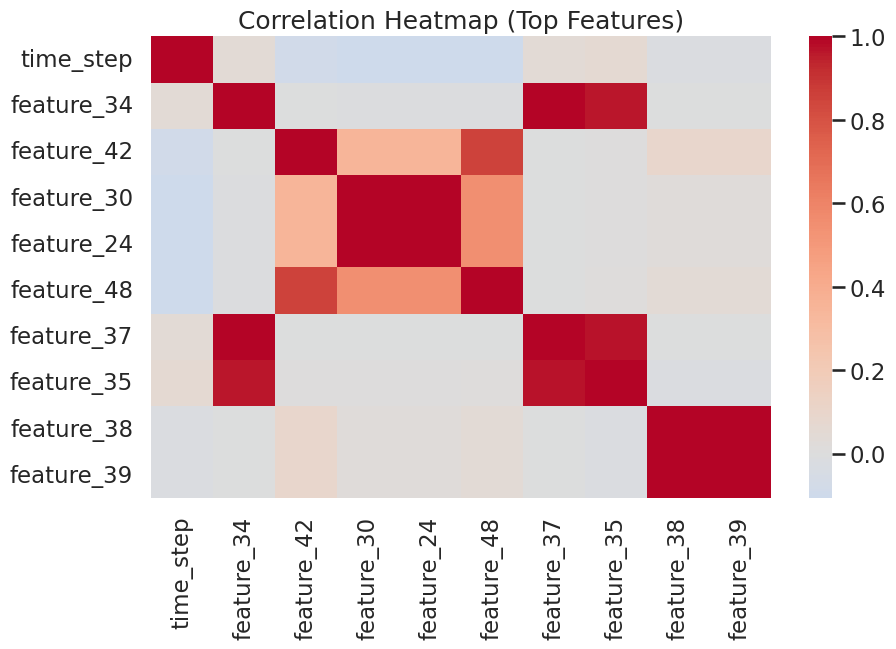

In [26]:
# Correlation Heatmap (Top 15 Features)

top_corr_features = feature_variance.index[:15]
corr_matrix = labeled_data[top_corr_features].corr()

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Heatmap (Top Features)")
plt.show()

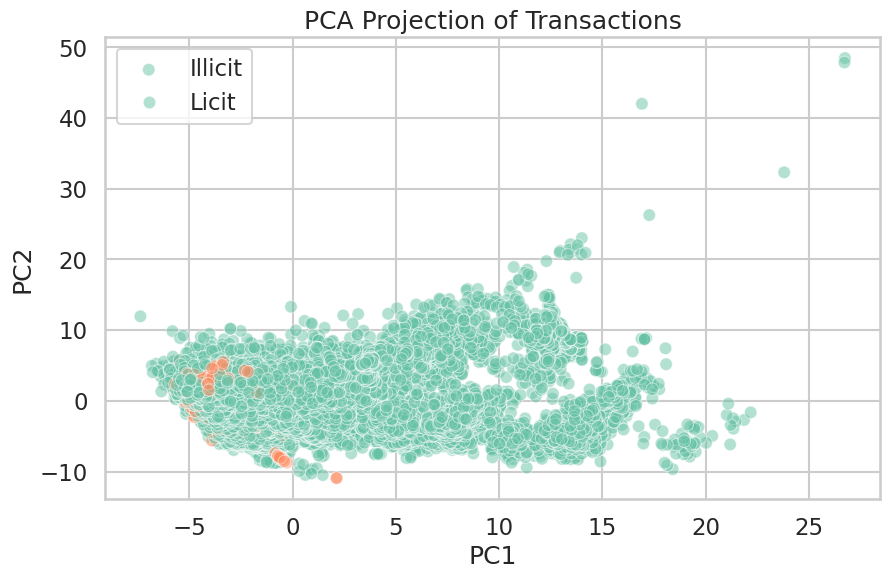

In [ ]:
# PCA Projection (2D)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(
    labeled_data.drop(columns=["txId", "label"])
)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["label"] = labeled_data["label"].values

sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="label",
    alpha=0.5
)
plt.legend(["Illicit", "Licit"])
plt.title("PCA Projection of Transactions")
plt.show()

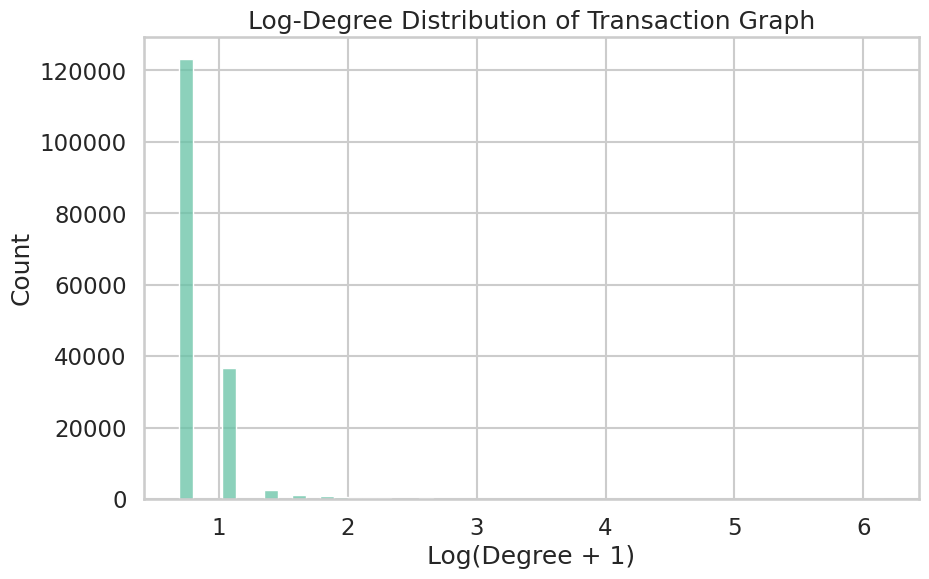

In [28]:
# Degree Distribution (Graph Insight)

degree_counts = tx_edges["txId1"].value_counts()

sns.histplot(
    np.log1p(degree_counts),
    bins=50
)
plt.title("Log-Degree Distribution of Transaction Graph")
plt.xlabel("Log(Degree + 1)")
plt.ylabel("Count")
plt.show()

In [29]:
labeled_data

,txId,time_step,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,class,label
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,-0.163905,1.059993,2.397457,-0.063200,-0.013282,4.800240,0.174329,-0.172908,0.619399,-0.243300,-0.243452,-0.139732,-0.146895,-0.079667,-0.155554,0.773847,0.378516,-0.139734,-0.146891,-0.079667,-0.155553,0.773932,0.378593,-0.024669,-0.031271,-0.023044,-0.026215,0.101008,0.026315,-0.227215,-0.156772,0.089307,-0.212195,-2.772015,-2.371969,-0.227203,-0.221151,-0.066858,-0.232011,-2.165534,-2.175855,-0.414008,4.181192,4.346640,1.777963,-1.451545,-1.530250,4.628683,0.513804,-0.163126,1.208220,-0.196435,-0.196189,4.629650,0.513869,-0.163115,1.208278,-0.196409,-0.196133,-0.017032,-0.030026,-0.017640,-0.015071,-0.140763,-0.140335,4.313295,0.216750,-0.250574,0.707151,-0.169119,-0.167165,6.220011,0.216948,-0.255168,0.717108,-0.187191,-0.185274,3.991587,0.810879,-0.694235,2.084651,0.025308,0.025217,-0.171098,0.266450,0.159432,-0.159946,0.970465,1.928382,-1.457953,-1.493992,-0.083124,-1.485957,-0.234171,-0.205513,-0.176219,-0.056011,-0.082822,-0.191696,0.323773,0.668621,-1.096336,0.787435,0.856163,-1.104530,0.715115,0.958373,-0.116425,0.312047,0.064623,-0.101755,-0.247676,-1.201993,-0.095559,0.523326,0.019771,-0.119195,0.147881,0.956170,0.759756,-0.041556,-0.188716,0.149949,-0.047722,-0.048171,-1.373723,-1.356131,-0.301754,-1.404445,0.183133,0.182748,-0.163577,-0.456561,-0.424672,-0.436915,0.143001,0.142525,-0.425896,-1.421138,-1.059868,-1.071885,0.185597,0.185492,-0.216814,-0.617907,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2,0
9,232029206,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,-0.144554,0.020069,-0.163135,1.696691,2.414968,-0.063200,-0.013282,2.370512,0.001525,-0.172908,0.221419,-0.243300,-0.243452,-0.139732,-0.147416,-0.079747,-0.155559,0.665165,1.037078,-0.139734,-0.147411,-0.079746,-0.155559,0.665251,1.037113,-0.024669,-0.031272,-0.023045,-0.026215,-0.973502,-0.973372,-0.227159,-0.156772,0.020778,-0.227569,-1.618971,-1.516593,-0.227144,-0.233499,-0.077441,-0.233665,-1.45232

Separate Features & Target

In [30]:
X = labeled_data.drop(columns=["txId", "label", "class"], errors="ignore")
y = labeled_data["label"]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [32]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape: ", X_test.shape, y_test.shape)

print("\nClass distribution (Train):")
print(y_train.value_counts(normalize=True))

print("\nClass distribution (Test):")
print(y_test.value_counts(normalize=True))

Train shape: (37251, 166) (37251,)
Test shape:  (9313, 166) (9313,)

Class distribution (Train):
label
0    0.902392
1    0.097608
Name: proportion, dtype: float64

Class distribution (Test):
label
0    0.902395
1    0.097605
Name: proportion, dtype: float64


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [34]:
X.columns[X.columns.str.contains("label|class", case=False)]

Index([], dtype='object')

4. Logistic Regression (Baseline)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)


log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1
)

log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [36]:
y_pred = log_reg.predict(X_test_scaled)

In [37]:
precision_licit = precision_score(y_test, y_pred)
recall_licit = recall_score(y_test, y_pred)
f1_licit = f1_score(y_test, y_pred)

print("Logistic Regression Performance (Licit Class)")
print(f"Precision (Licit): {precision_licit:.4f}")
print(f"Recall (Licit):    {recall_licit:.4f}")
print(f"F1-score (Licit):  {f1_licit:.4f}")

Logistic Regression Performance (Licit Class)
Precision (Licit): 0.4449
Recall (Licit):    0.9318
F1-score (Licit):  0.6022


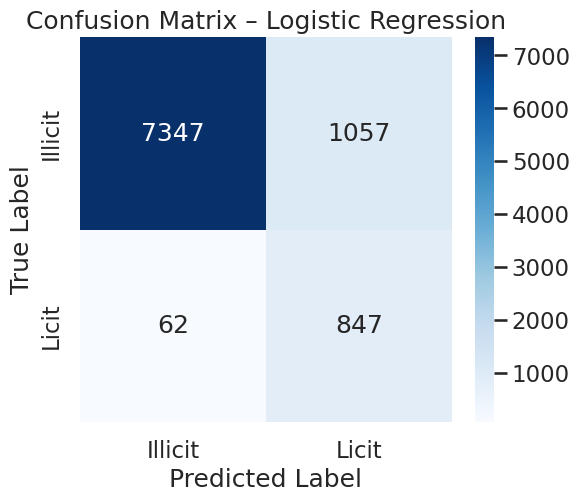

In [38]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1])

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Illicit", "Licit"],
    yticklabels=["Illicit", "Licit"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

6. Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_leaf=1,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [40]:
y_pred_rf = rf.predict(X_test)

In [41]:
precision_licit = precision_score(y_test, y_pred_rf)
recall_licit = recall_score(y_test, y_pred_rf)
f1_licit = f1_score(y_test, y_pred_rf)

print("Random Forest Performance (Licit Class)")
print(f"Precision (Licit): {precision_licit:.4f}")
print(f"Recall (Licit):    {recall_licit:.4f}")
print(f"F1-score (Licit):  {f1_licit:.4f}")

Random Forest Performance (Licit Class)
Precision (Licit): 0.9962
Recall (Licit):    0.8757
F1-score (Licit):  0.9321


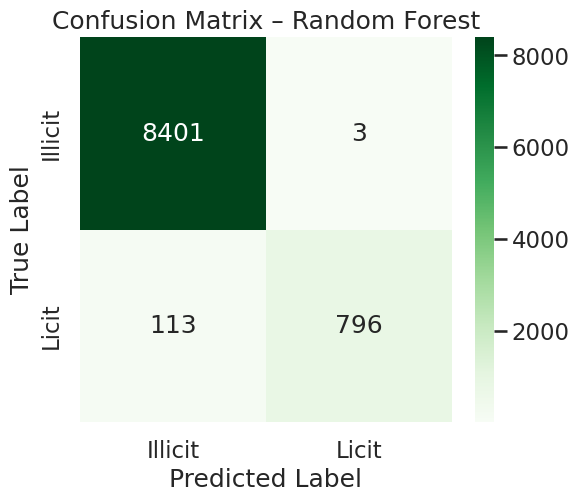

In [42]:
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=[0, 1])

plt.figure(figsize=(6,5))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["Illicit", "Licit"],
    yticklabels=["Illicit", "Licit"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Random Forest")
plt.show()

In [43]:
# Get importance values from trained Random Forest
importances = rf.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances
})

# Sort descending
feature_importance_df = feature_importance_df.sort_values(
    by="importance",
    ascending=False
)

In [44]:
feature_importance_df.head(10)

,feature,importance
53,feature_53,0.044210
55,feature_55,0.040058
14,feature_14,0.033828
47,feature_47,0.033684
5,feature_5,0.031626
18,feature_18,0.031047
66,feature_66,0.030884
49,feature_49,0.028572
90,feature_90,0.028370
41,feature_41,0.028106


/tmp/ipykernel_55/936086230.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


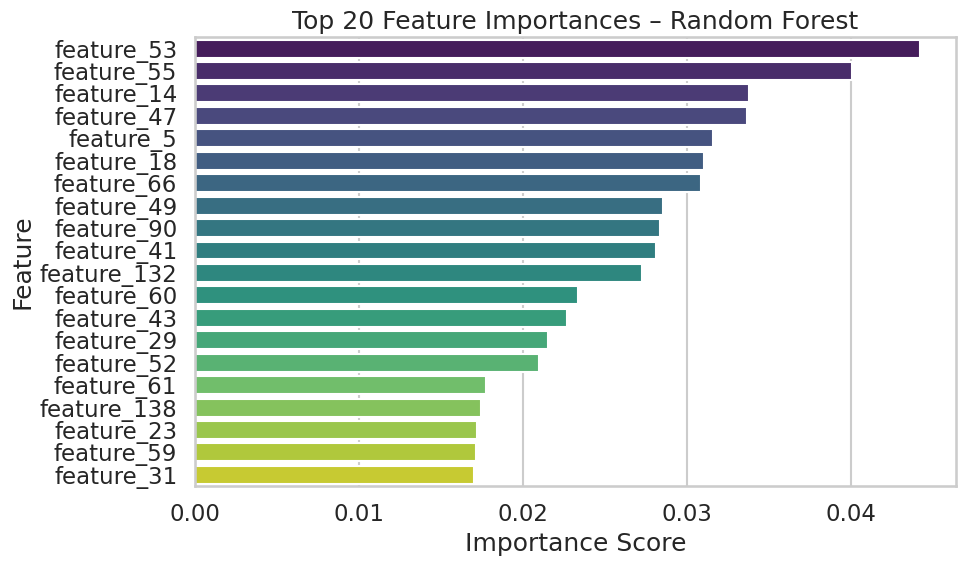

In [45]:
top_n = 20
top_features = feature_importance_df.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_features,
    x="importance",
    y="feature",
    palette="viridis"
)

plt.title("Top 20 Feature Importances – Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

7. XG BOOST MODEL

In [46]:
from xgboost import XGBClassifier

# Calculate imbalance ratio
n_licit = (y_train == 1).sum()
n_illicit = (y_train == 0).sum()

scale_pos_weight = n_licit / n_illicit
print("scale_pos_weight:", scale_pos_weight)

scale_pos_weight: 0.10816599732262383


In [47]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    scale_pos_weight=scale_pos_weight,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, ...)

In [48]:
y_pred_xgb = xgb.predict(X_test)

In [49]:
precision_licit = precision_score(y_test, y_pred_xgb)
recall_licit = recall_score(y_test, y_pred_xgb)
f1_licit = f1_score(y_test, y_pred_xgb)

print("XGBoost Performance (Licit Class)")
print(f"Precision (Licit): {precision_licit:.4f}")
print(f"Recall (Licit):    {recall_licit:.4f}")
print(f"F1-score (Licit):  {f1_licit:.4f}")

XGBoost Performance (Licit Class)
Precision (Licit): 0.9987
Recall (Licit):    0.8779
F1-score (Licit):  0.9344


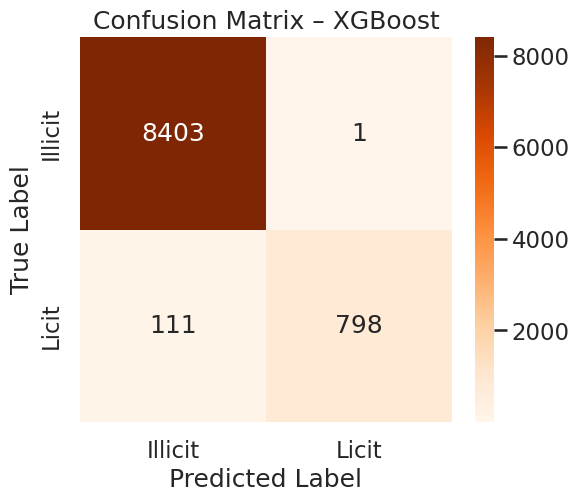

In [50]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=[0,1])

plt.figure(figsize=(6,5))
sns.heatmap(
    cm_xgb,
    annot=True,
    fmt="d",
    cmap="Oranges",
    xticklabels=["Illicit", "Licit"],
    yticklabels=["Illicit", "Licit"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – XGBoost")
plt.show()

Comparision

In [51]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Precision (Licit)": [0.4453, 0.9963, 0.9987],
    "Recall (Licit)": [0.9307, 0.8812, 0.8779],
    "F1-score (Licit)": [0.6023, 0.9352, 0.9344]
})

results

,Model,Precision (Licit),Recall (Licit),F1-score (Licit)
0,Logistic Regression,0.4453,0.9307,0.6023
1,Random Forest,0.9963,0.8812,0.9352
2,XGBoost,0.9987,0.8779,0.9344


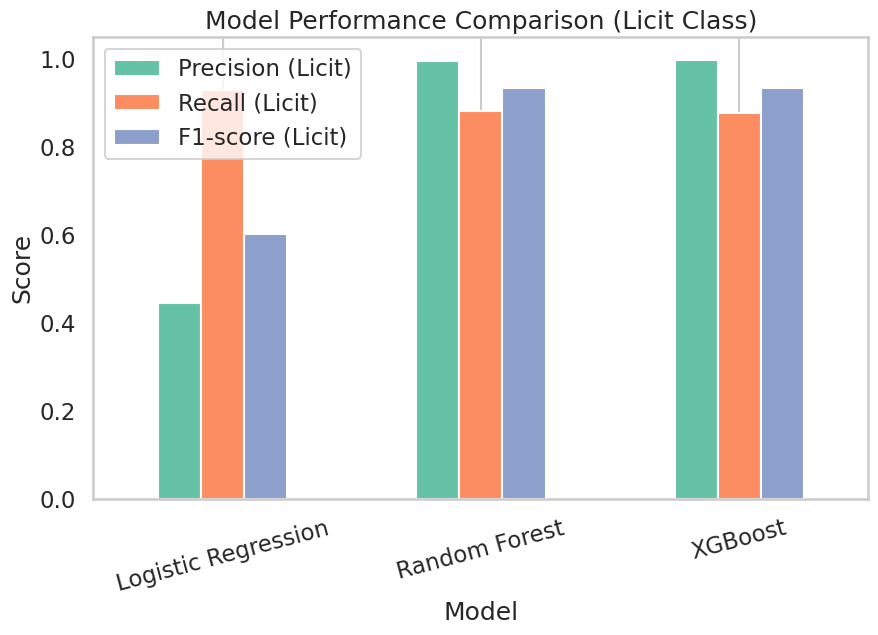

In [52]:
results.set_index("Model").plot(
    kind="bar",
    figsize=(10,6)
)

plt.title("Model Performance Comparison (Licit Class)")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=15)
plt.grid(axis="y")
plt.show()

**Node2Vec + XGBoost**

In [53]:
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 111.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.26.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
google-colab 1.0.0 requires jupyter-server==2.14.0, but you have jupyter-server 2.12.5 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
jaxlib 0.7.2 req

In [67]:
import networkx as nx
from node2vec import Node2Vec

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve
)

from xgboost import XGBClassifier

In [68]:
tx_edges.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [69]:
X_tab = labeled_data.drop(columns=["txId", "label", "class"], errors="ignore")
y = labeled_data["label"]
tx_ids = labeled_data["txId"].astype(str)

In [70]:
X_train_tab, X_test_tab, y_train, y_test, tx_train, tx_test = train_test_split(
    X_tab,
    y,
    tx_ids,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [71]:
edges_str = tx_edges.copy()
edges_str["txId1"] = edges_str["txId1"].astype(str)
edges_str["txId2"] = edges_str["txId2"].astype(str)

tx_ids_str = labeled_data["txId"].astype(str)

In [72]:
G = nx.from_pandas_edgelist(
    edges_str,
    source="txId1",
    target="txId2",
    create_using=nx.Graph()
)

# Keep only labeled nodes
G = G.subgraph(tx_ids_str).copy()

In [73]:
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())

Nodes: 46564
Edges: 36624


In [74]:
from node2vec import Node2Vec

node2vec = Node2Vec(
    G,
    dimensions=64,
    walk_length=15,
    num_walks=5,
    workers=1,          
    seed=42,
    quiet=True
)

In [75]:
n2v_model = node2vec.fit(
    vector_size=64,
    window=10,
    min_count=1,
    sg=1,
    epochs=5
)

In [76]:
# Check vocab size
len(n2v_model.wv)

46564

In [77]:
n2v_model.wv[tx_ids_str.iloc[0]]

array([ 0.14675692, -0.7216657 , -0.08904407,  1.7160466 ,  0.44586903,
       -0.7295071 ,  1.1543429 ,  0.9306165 , -1.3430508 , -1.9109812 ,
        1.4775436 , -0.93415564,  0.39445522, -0.9952419 ,  0.06218731,
       -1.0389738 , -1.0866807 ,  0.766781  ,  0.50794834,  1.1171579 ,
       -0.5535246 ,  0.8603142 , -0.07035062, -0.05068045, -0.29517868,
        1.3886204 ,  0.314011  ,  0.17606884,  0.15007176,  0.781376  ,
        1.0742581 , -0.58111215, -1.1690917 , -0.9089503 ,  0.10983458,
        0.58461785, -0.345313  , -0.1550272 ,  0.9539543 ,  0.15024571,
        0.44018498, -1.5457747 , -0.58590484, -0.16210672,  0.5582715 ,
       -0.9260679 , -0.32813492, -1.2684338 ,  0.31159925,  1.882833  ,
        0.370494  ,  0.91153413,  0.92812985,  0.48310402,  0.2513847 ,
       -0.77133733, -0.5748269 , -1.3616645 ,  1.2755389 , -0.60832334,
        0.10594341,  0.1224017 , -0.812801  , -0.04379513], dtype=float32)

In [78]:
tx_ids_str = labeled_data["txId"].astype(str).values

embeddings = np.array([
    n2v_model.wv[txid] for txid in tx_ids_str
])

print("Embeddings shape:", embeddings.shape)

Embeddings shape: (46564, 64)


In [79]:
X_tab = labeled_data.drop(
    columns=["txId", "label", "class"],
    errors="ignore"
)

y = labeled_data["label"]

In [80]:
X_tab_train, X_tab_test, emb_train, emb_test, y_train, y_test = train_test_split(
    X_tab,
    embeddings,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [81]:
X_train = np.hstack([X_tab_train.values, emb_train])
X_test  = np.hstack([X_tab_test.values, emb_test])

print("Final Train shape:", X_train.shape)
print("Final Test shape :", X_test.shape)

Final Train shape: (37251, 230)
Final Test shape : (9313, 230)


In [82]:
n_licit = (y_train == 1).sum()
n_illicit = (y_train == 0).sum()

scale_pos_weight = n_licit / n_illicit
scale_pos_weight

np.float64(0.10816599732262383)

In [83]:
from xgboost import XGBClassifier

xgb_n2v = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    scale_pos_weight=scale_pos_weight,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

xgb_n2v.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, ...)

In [84]:
y_pred = xgb_n2v.predict(X_test)
y_prob = xgb_n2v.predict_proba(X_test)[:, 1]

In [85]:
print("Node2Vec + XGBoost Performance")
print("Precision (Licit):", precision_score(y_test, y_pred))
print("Recall (Licit):   ", recall_score(y_test, y_pred))
print("F1-score (Licit): ", f1_score(y_test, y_pred))

Node2Vec + XGBoost Performance
Precision (Licit): 0.9987437185929648
Recall (Licit):    0.8745874587458746
F1-score (Licit):  0.9325513196480938


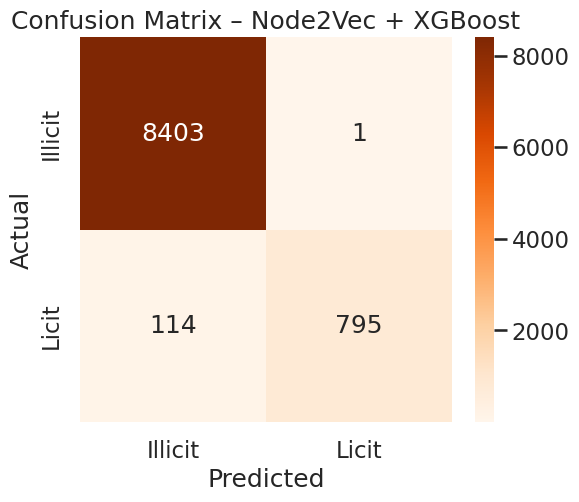

In [86]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1])

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Oranges",
    xticklabels=["Illicit", "Licit"],
    yticklabels=["Illicit", "Licit"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Node2Vec + XGBoost")
plt.show()

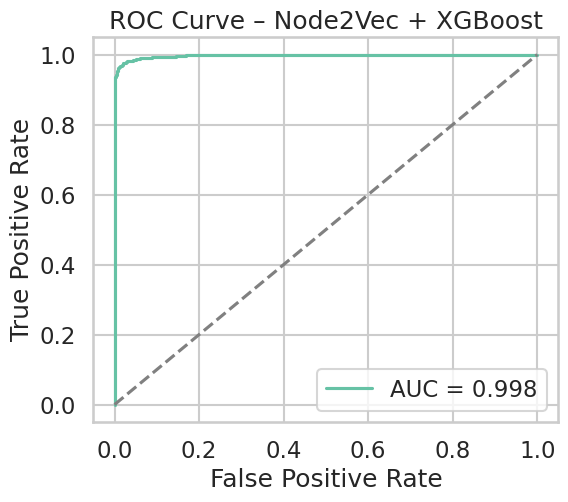

In [87]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Node2Vec + XGBoost")
plt.legend()
plt.grid(True)
plt.show()

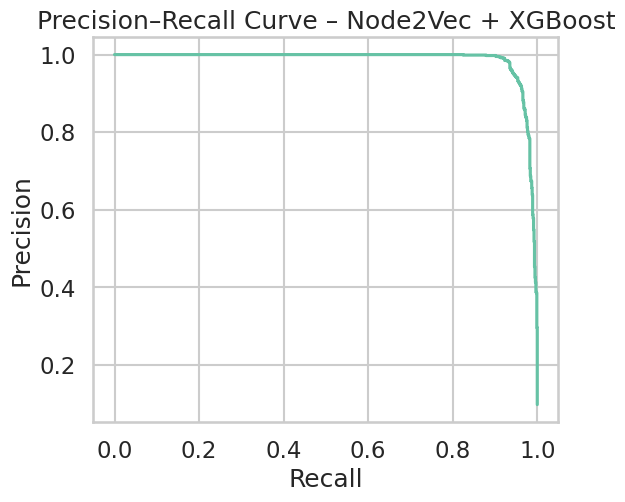

In [88]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Node2Vec + XGBoost")
plt.grid(True)
plt.show()